In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/drive/MyDrive/GoogleColab/web social media anlysis and visualization/api_news_articles.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset and the column names
print(data.head())
print(data.columns)


                                               title  \
0  Google Pixel 8A: News, Specs, Features, Price,...   
1  The Rabbit R1 Flops, Nokia Gets Back to Basics...   
2  Elon Musk outlines vision for AI-driven news s...   
3  Jeff Bridges Is Returning to the Grid for Tron...   
4  A national shortage of construction workers is...   

                                             content  
0  Googles Pixel A-series Android smartphones hav...  
1  If you thought the less-than-stellar launch of...  
2  Elon Musk, CEO of X (formerly Twitter), shared...  
3  Jared Leto may be the main star of the upcomin...  
4  When the pandemic hit the US in the spring of ...  
Index(['title', 'content'], dtype='object')


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import string

nltk.download('stopwords')
nltk.download('wordnet')

# Initializing objects
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_doc(doc):
    # Tokenize and remove punctuation
    tokens = tokenizer.tokenize(doc.lower())

    # Remove stopwords and numbers
    tokens = [word for word in tokens if (word not in stop_words) and not word.isdigit()]

    # Lemmatize
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]

    # Stem
    stemmed = [stemmer.stem(word) for word in lemmatized]

    return ' '.join(stemmed)

# Apply preprocessing to the content column
doc_clean = [clean_doc(doc).split() for doc in data['content']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import matplotlib.pyplot as plt


Total Word Count: 526


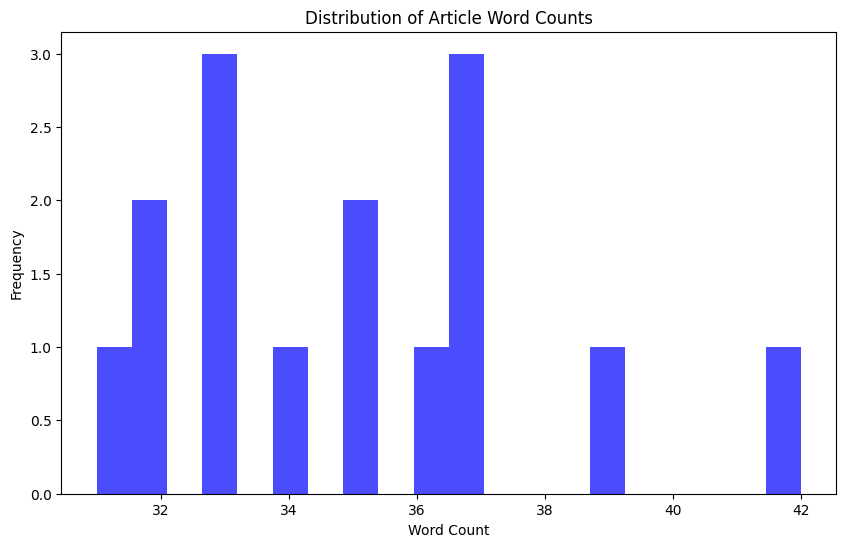

In [ ]:
# Word counts per article
data['word_count'] = data['content'].apply(lambda x: len(x.split()))
print("Total Word Count:", data['word_count'].sum())

# Visualize word count distribution
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from gensim import corpora, models

dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

# LDA Model
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=50)
print(ldamodel.show_topics())

# LSI Model
lsimodel = models.LsiModel(corpus, num_topics=5, id2word=dictionary)
print(lsimodel.show_topics())


[(0, '0.017*"ai" + 0.017*"platform" + 0.017*"news" + 0.017*"week" + 0.017*"enhanc" + 0.017*"reveal" + 0.017*"elon" + 0.017*"email" + 0.017*"formerli" + 0.017*"capabl"'), (1, '0.028*"char" + 0.019*"time" + 0.019*"news" + 0.019*"mani" + 0.010*"action" + 0.010*"today" + 0.010*"financi" + 0.010*"releas" + 0.010*"huge" + 0.010*"home"'), (2, '0.027*"char" + 0.019*"fan" + 0.019*"superman" + 0.010*"announc" + 0.010*"come" + 0.010*"releas" + 0.010*"littl" + 0.010*"genr" + 0.010*"space" + 0.010*"horror"'), (3, '0.037*"char" + 0.031*"googl" + 0.019*"year" + 0.019*"pixel" + 0.019*"smartphon" + 0.013*"take" + 0.013*"come" + 0.013*"develop" + 0.013*"launch" + 0.013*"confer"'), (4, '0.024*"new" + 0.024*"char" + 0.013*"return" + 0.013*"may" + 0.013*"seri" + 0.013*"are" + 0.013*"podcast" + 0.013*"star" + 0.013*"face" + 0.013*"third"')]
[(0, '0.517*"char" + 0.337*"googl" + 0.199*"year" + 0.182*"new" + 0.170*"pixel" + 0.168*"may" + 0.166*"time" + 0.152*"smartphon" + 0.147*"come" + 0.136*"seri"'), (1, '0.

In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


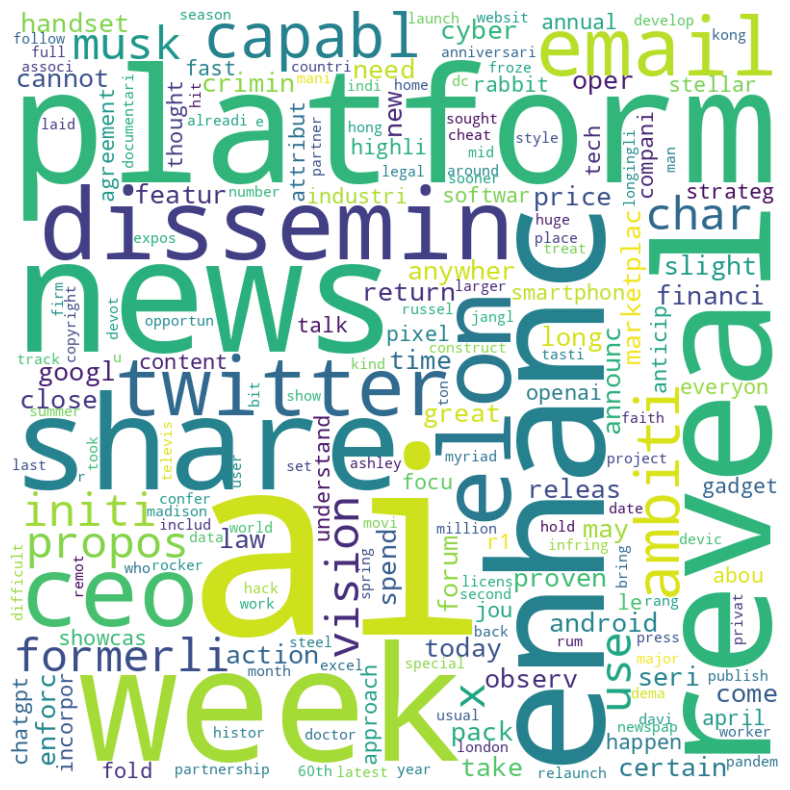

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for first topic
plt.figure(figsize=(10, 10))
wc = WordCloud(background_color='white', width=800, height=800)
wc.generate_from_frequencies(dict(ldamodel.show_topic(0, 200)))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Interactive topic model visualization
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)
